# Data Preprocessing

The probability of anomalous data has increased in today’s data due to its humongous size and its origin for heterogenous sources. Considering the fact that high quality data leads to better models and predictions, data preprocessing has become vital–and the fundamental step in the data science/machine learning/AI pipeline. In this session, we’ll talk about the need to process data and discuss different approaches to each step in the process.

<u>While gathering data, one might come across three main factors that would contribute to the quality of data:</u>

<b>Accuracy:</b> Erroneous values that deviate from the expected. The causes for inaccurate data can be various, which include:

* Human/computer errors during data entry and transmission
* Users deliberately submitting incorrect values (called disguised missing data)
* Incorrect formats for input fields
* Duplication of training examples

<b>Completeness:</b> Lacking attribute/feature values or values of interest. The dataset might be incomplete due to:

* Unavailability of data
* Deletion of inconsistent data
* Deletion of data deemed irrelevant initially

<b>Consistency:</b> Aggregation of data is inconsistent.

* Some other features that also affect the data quality include timeliness (the data is incomplete until all relevant information is submitted after certain time periods), believability (how much the data is trusted by the user) and interpretability (how easily the data is understood by all stakeholders).

To ensure high quality data, it’s crucial to preprocess it. To make the process easier, data preprocessing is divided into four stages: data cleaning, data integration, data reduction, and data transformation.

## Data cleaning
Data cleaning refers to techniques to ‘clean’ data by removing outliers, replacing missing values, smoothing noisy data, and correcting inconsistent data. Many techniques are used to perform each of these tasks, where each technique is specific to user’s preference or problem set. Below, each task is explained in terms of the techniques used to overcome it.

### Missing values
In order to deal with missing data, multiple approaches can be used. Let’s look at each of them.

* Removing the training example: You can ignore the training example if the output label is missing (if it is a classification problem). This is usually discouraged as it leads to loss of data, as you are removing the attribute values that can add value to data set as well.
* Filling in missing value manually: This approach is time consuming, and not recommended for huge data sets.
* Using a standard value to replace the missing value: The missing value can be replaced by a global constant such as ‘N/A’ or ‘Unknown’. This is a simple approach, but not foolproof.
* Using central tendency (mean, median, mode) for attribute to replace the missing value: Based on data distribution, mean (in case of normal distribution) or median (for non-normal distribution) can be used to fill in for the missing value.
* Using central tendency (mean, median, mode) for attribute belonging to same class to replace the missing value: This is the same as method 4, except that the measures of central tendency are specific to each class.
* Using the most probable value to fill in the missing value: Using algorithms like regression and decision tree, the missing values can be predicted and replaced.

### Noisy data
Noise is defined as a random variance in a measured variable. For numeric values, boxplots and scatter plots can be used to identify outliers. To deal with these anomalous values, data smoothing techniques are applied, which are described below.

* Binning: Using binning methods smooths sorted value by using the values around it. The sorted values are then divided into ‘bins’. There are various approaches to binning. Two of them are smoothing by bin means where each bin is replaced by the mean of bin’s values, and smoothing by bin medians where each bin is replaced by the median of bin’s values.
* Regression: Linear regression and multiple linear regression can be used to smooth the data, where the values are conformed to a function.
* Outlier analysis: Approaches such as clustering can be used to detect outliers and deal with them.

### Data integration
Since data is being collected from multiple sources, data integration has become a vital part of the process. This may lead to redundant and inconsistent data, which could result in poor accuracy and speed of data model. To deal with these issues and maintain the data integrity, approaches such as tuple duplication detection and data conflict detection are sought after. The most common approaches to integrate data are explained below.

* Data consolidation: The data is physically bought together to one data store. This usually involves Data Warehousing.
* Data propagation: Copying data from one location to another using applications is called data propagation. It can be synchronous or asynchronous and is event-driven.
* Data virtualization: An interface is used to provide a real-time and unified view of data from multiple sources. The data can be viewed from a single point of access.

### Data reduction
The purpose of data reduction is to have a condensed representation of the data set which is smaller in volume, while maintaining the integrity of original. This results in efficient yet similar results. A few methods to reduce the volume of data are:

* Missing values ratio: Attributes that have more missing values than a threshold are removed.
* Low variance filter: Normalized attributes that have variance (distribution) less than a threshold are also removed, since little changes in data means less information.
* High correlation filter: Normalized attributes that have correlation coefficient more than a threshold are also removed, since similar trends means similar information is carried. Correlation coefficient is usually calculates using statistical methods such as Pearson’s chi-square value etc.
* Principal component analysis: Principal component analysis, or PCA, is a statistical method which reduces the numbers of attributes by lumping highly correlated attributes together. With each iteration, the initial features are reduced to principal components, with greater variance than the original set on the condition that they are uncorrelated with the preceding components. This method, however, only works for features with numerical values.

### Data transformation
The final step of data preprocessing is transforming the data into form appropriate for Data Modeling. Strategies that enable data transformation include:

* Smoothing
Attribute/feature construction: New attributes are constructed from the given set of attributes.
* Aggregation: Summary and Aggregation operations are applied on the given set of attributes to come up with new attributes.
* Normalization: The data in each attribute is scaled between a smaller range e.g. 0 to 1 or -1 to 1.
* Discretization: Raw values of the numeric attributes are replaced by discrete or conceptual intervals, which can in return be further organized into higher level intervals.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### StandardScaler
* Different Features can be in differnt scale
* We need to bring all features to the same scale

In [2]:
df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

In [4]:
np.mean(df.x1)

0.0061496469936703525

In [5]:
np.std(df.x1)

1.9785588997895198

In [9]:
(df.x1 - np.mean(df.x1))/np.std(df.x1)

0       2.102310
1      -0.096201
2      -0.211852
3      -1.277666
4       0.418316
          ...   
9995    1.240981
9996    0.288052
9997   -1.211382
9998    1.353289
9999   -0.026663
Name: x1, Length: 10000, dtype: float64

In [10]:
from sklearn.preprocessing import StandardScaler

In [12]:
ss = StandardScaler()
ss.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
ss.mean_

array([ 0.00614965,  5.02552597, -5.00422616])

In [15]:
np.sqrt(ss.var_)

array([1.9785589 , 2.9728789 , 5.07806856])

In [17]:
res = ss.transform(df)

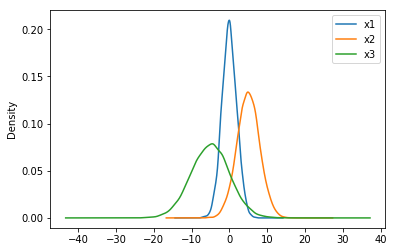

In [18]:
df.plot.kde()

In [19]:
df_tf = pd.DataFrame(res)

In [21]:
df_tf.columns = ['X1','X2','X3']

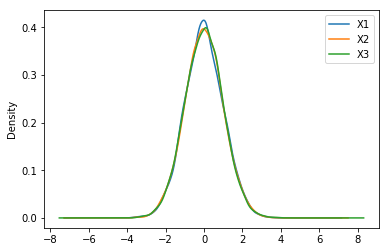

In [22]:
df_tf.plot.kde()

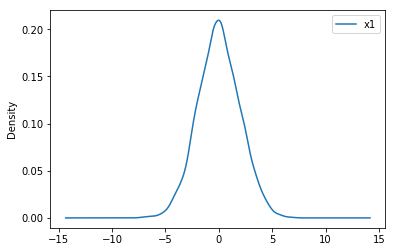

In [24]:
df[['x1']].plot.kde()

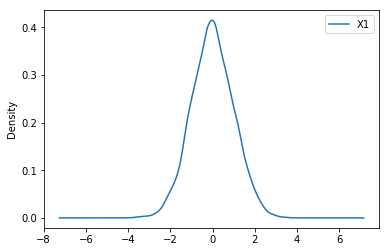

In [25]:
df_tf[['X1']].plot.kde()

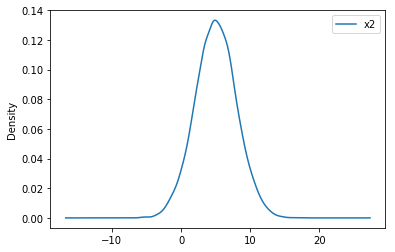

In [26]:
df[['x2']].plot.kde()

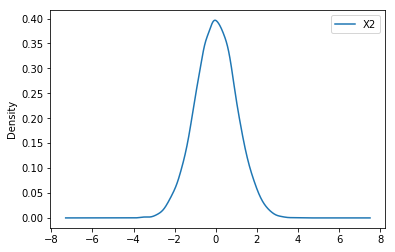

In [27]:
df_tf[['X2']].plot.kde()

* For Many ML algorithms, the value of data don't matter as much as the relationship between values
* Standard Scaler is Good for normally distributed data

### MinMaxScaler
* Suited when Data is not normally distributed

In [28]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

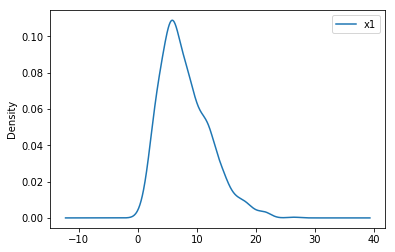

In [29]:
df[['x1']].plot.kde()

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
mm = MinMaxScaler()

In [32]:
mm.fit(df)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [33]:
mm.min_

array([-0.02614316, -0.51538475, -2.0199937 ])

In [34]:
mm.data_range_

array([25.74787324, 26.28165316, 19.63565154])

In [35]:
res = mm.transform(df)

In [37]:
df_tf = pd.DataFrame(res)
df_tf.columns = ['X1','X2','X3']

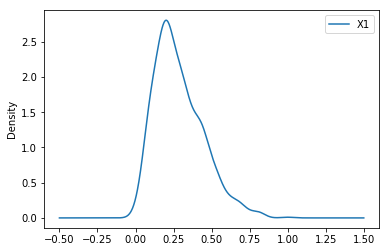

In [38]:
df_tf[['X1']].plot.kde()

In [39]:
house_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt',index_col='Unnamed: 0')

In [40]:
house_data.columns

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom',
       'Price'],
      dtype='object')

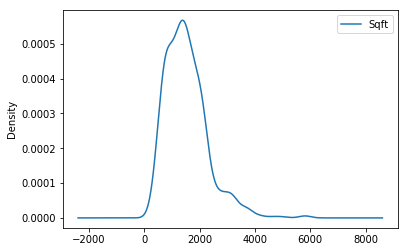

In [41]:
house_data[['Sqft']].plot.kde()

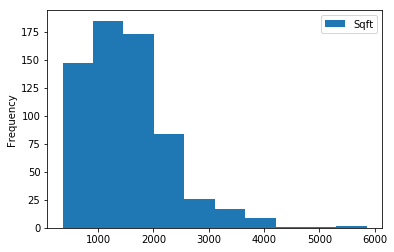

In [43]:
house_data[['Sqft']].plot.hist()

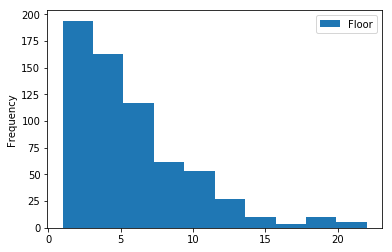

In [44]:
house_data[['Floor']].plot.hist()

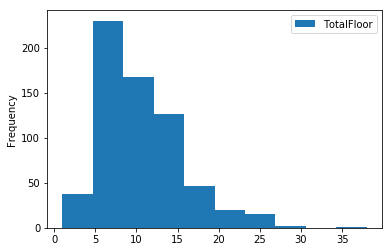

In [45]:
house_data[['TotalFloor']].plot.hist()

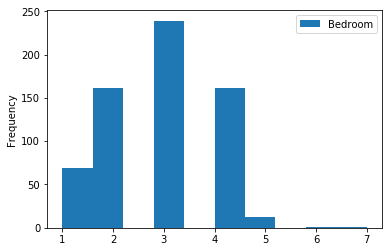

In [46]:
house_data[['Bedroom']].plot.hist()

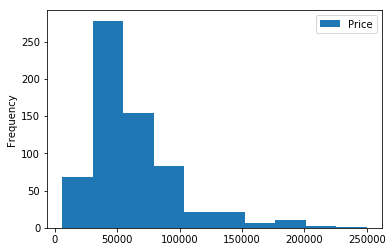

In [47]:
house_data[['Price']].plot.hist()

### Important Interview Question :How to check if data is normally distributed
* Graphical Methods Like Histogram or Kde or QQPlot (suggested read)
* Statical Test - Shapiro-Wilk Test, K^2 Test,  AD Test (additional read)

### RobustScaler
* Earlier Scaling Methods are impacted by Outliers
* Robustcaler takes care of outliers

### TODO Alert : Try Yourself Out

In [49]:
### Normalizer

In [50]:
df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})

In [54]:
np.sqrt(np.sum(np.square(df),axis=1))

0       81.694553
1       53.795911
2      105.095195
3      118.949569
4       95.697440
          ...    
995     68.767725
996    132.778010
997     67.889616
998    142.337627
999    105.645634
Length: 1000, dtype: float64

In [55]:
df[:4]

,x1,y1,z1
0,52.0,51.0,-37.0
1,-22.0,3.0,-49.0
2,48.0,79.0,50.0
3,-84.0,-42.0,-73.0


In [56]:
from sklearn.preprocessing import Normalizer

In [57]:
nn = Normalizer()

In [58]:
nn.fit(df)

Normalizer(copy=True, norm='l2')

In [59]:
res = nn.transform(df)

In [60]:
res[:5]

array([[ 0.63651734,  0.62427663, -0.45290657],
       [-0.40895302,  0.05576632, -0.9108499 ],
       [ 0.45672878,  0.75169945,  0.47575914],
       [-0.70618162, -0.35309081, -0.61370546],
       [-0.89866563,  0.0940464 ,  0.42843361]])

In [62]:
df[:1]/81.694553

,x1,y1,z1
0,0.636517,0.624277,-0.452907


In [63]:
df_tf = pd.DataFrame(res)

In [64]:
df_tf.columns = ['x1','x2','x3']

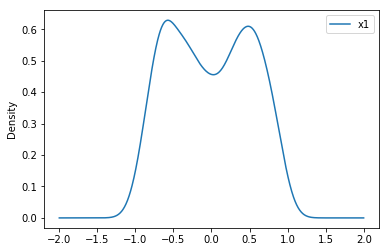

In [66]:
df_tf[['x1']].plot.kde()

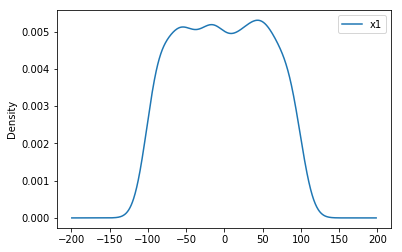

In [67]:
df[['x1']].plot.kde()

### Interview Question 
* When to use scaling & when to use Normalization

### Binerization Technique
* Binning data into buckets

### Dealing with Nominal & Ordinal Data
* LabelEncoder  - Takes col, Returns encoded
* LabelBinerizer - Takes col, Returns onehot
* OneHotEncoder - Takes mul cols, Returns onehot
* OrdinalEncoder - Takes mul cols, Returns encoded

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
le = LabelEncoder()

In [70]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Income':['Low','Low','High','Medium','Medium','High']})

In [72]:
le.fit(df.Income)

LabelEncoder()

In [73]:
le.classes_

array(['High', 'Low', 'Medium'], dtype=object)

In [76]:
le.transform(df.Income)

array([1, 1, 0, 2, 2, 0])

* LabelEncoder works on a column

In [77]:
from sklearn.preprocessing import LabelBinarizer

In [78]:
lb = LabelBinarizer()

In [79]:
lb.fit(df.Income)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [80]:
lb.transform(df.Income)

array([[0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0]])

In [81]:
lb.classes_

array(['High', 'Low', 'Medium'], dtype='<U6')

* LabelBinerizer also works on a column

In [89]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Income':['Low','Low','High','Medium','Medium','High'],
    'Location':['Delhi','Mumbai','Bangalore','Kolkata','Chennai','Mumbai']})

In [90]:
from sklearn.preprocessing import OneHotEncoder

In [91]:
ohe = OneHotEncoder()

In [92]:
ohe.fit(df[['Income','Location']])

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [93]:
ohe.categories_

[array(['High', 'Low', 'Medium'], dtype=object),
 array(['Bangalore', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai'], dtype=object)]

In [94]:
ohe.transform(df[['Income','Location']])

<6x8 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [95]:
ohe.transform(df[['Income','Location']]).toarray()

array([[0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1.]])

* OneHotEncoder converts data into one hot information & takes multiple columns as input

In [96]:
from sklearn.preprocessing import OrdinalEncoder

In [97]:
ode = OrdinalEncoder()

In [98]:
ode.fit(df[['Income','Location']])

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)

In [99]:
ode.transform(df[['Income','Location']])

array([[1., 2.],
       [1., 4.],
       [0., 0.],
       [2., 3.],
       [2., 1.],
       [0., 4.]])

### Interview Alert
* When to use One Hot Encoding - If there is no order in the data column like gender
     - OHE will increase the number of columns & thus data sizes
* When to use Label Encoding - If there is order in the data use label encoding like low medium high
* As we learn more about estimators, we will realize usage of these preprocessors